### import

In [1]:
import os 
import pandas as pd 
import numpy as np 
import re
import tqdm 
import matplotlib.pyplot as plt


from nltk import ngrams
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
from collections import Counter
import sentencepiece as spm

In [2]:
# ! pip install pandas==1.5.3
print(pd.__version__)

1.5.3


In [3]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon'

In [4]:
df_train = pd.read_pickle(directory + '/data_train_spm_4000_0317.pkl','gzip')
df_test = pd.read_pickle(directory + '/data_test_spm_4000_0317.pkl','gzip')
df_test['weight'] = df_test['tok_cat'].apply(lambda x : 14 - x)
df_test = df_test.loc[df_test['tok_cat'] < 6].sample(n=250, weights = 'weight' ,random_state=6) # validation 시간이 너무 오래 걸림, 250개만 사용

### import Tokenizer

In [6]:
data_path = os.getenv('HOME') +'/PocLab/Model'
spm_4000 = spm.SentencePieceProcessor()
spm_4000.Load(data_path + '/spm_dec_v.model')


data_path = os.getenv('HOME') +'/PocLab/Preprocessing'
spm_8000 = spm.SentencePieceProcessor()
spm_8000.Load(data_path + '/spm_dec_8009.model')

msp_4000 = spm.SentencePieceProcessor()
msp_4000.Load(data_path + '/spm_dec_mecab_4009.model')

msp_8000 = spm.SentencePieceProcessor()
msp_8000.Load(data_path + '/spm_dec_msp8009.model')

custom_msp_4000 = spm.SentencePieceProcessor()
custom_msp_4000.Load(data_path + '/spm_dec_custom_msp4009.model')

custom_msp_8000 =  spm.SentencePieceProcessor()
custom_msp_8000.Load(data_path + '/spm_dec_custom_msp8009.model')


True

In [7]:
# 토크나이저 dict 만들기

tokenizers_4000 = {'spm' : spm_4000, 'msp' : msp_4000, 'custom_msp' : custom_msp_4000}
tokenizers_8000 = {'spm' : spm_8000, 'msp' : msp_8000, 'custom_msp' : custom_msp_8000}

# Wordcloud

In [8]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.font_manager as fm

In [9]:
from collections import Counter

In [10]:
from konlpy.tag import Mecab
mecab = Mecab()

In [11]:
dial = df_train.dial.values

In [12]:
df_train['token'] = df_train['dial'].apply(mecab.morphs)

In [13]:
counter = Counter()
for i in df_train.token :
    counter.update(i)
counter.most_common(30)

[('이', 1696238),
 ('.', 1244924),
 ('가', 879735),
 ('는', 780776),
 ('하', 584246),
 ('게', 560331),
 ('고', 528576),
 ('을', 485333),
 ('어', 470998),
 ('거', 464850),
 ('?', 464280),
 ('에', 444899),
 ('도', 435993),
 ('은', 412780),
 ('있', 410805),
 ('지', 404022),
 ('나', 396054),
 ('쫌', 360430),
 ('그', 356773),
 ('구', 355267),
 ('~', 348326),
 ('를', 325656),
 ('아', 322625),
 ('꼬', 309606),
 ('느', 289398),
 ('들', 287596),
 ('내', 262223),
 ('다', 238730),
 ('기', 232866),
 ('잉', 229252)]

In [15]:
regs = ['kw','jj','cc','gs','jd']

100%|██████████| 241781/241781 [00:21<00:00, 11448.41it/s]


<Figure size 1080x5040 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

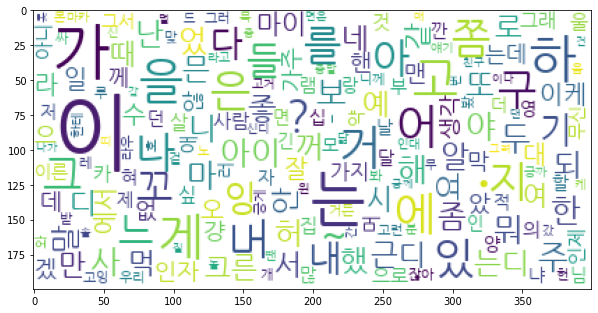

In [16]:
fig = plt.figure(figsize=(15,70))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    dial = df_train.loc[df_train['reg'] == reg,'dial'].values
    for k in tqdm.tqdm(dial) :
        tokenized = ''.join(spm_4000.encode_as_pieces(k)).replace('▁',' ').split()
        token_words = ngrams(tokenized,1)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(100))
    
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=60)
    cloud = wc.generate_from_frequencies(counter)
    fig = plt.figure(figsize =(10,10))
    
plt.imshow(cloud)
plt.show()

#     # Barplot that shows the top most common
    
#     plt.subplot(5,1,i+1)
#     sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
#     sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

#     # Setting axes labels
#     sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Unigrams', title = f'Top 100 Unigrams : {reg}')
#     plt.xticks(fontsize=10)
#     plt.yticks(fontsize=10)

    
# plt.tight_layout()
# plt.show()

In [18]:
fig = plt.figure(figsize=(15,70))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    dial = df_train.loc[df_train['reg'] == reg,'dial'].values
    for k in tqdm.tqdm(dial) :
        tokenized = ''.join(spm_4000.encode_as_pieces(k)).replace('▁',' ').split()
        token_words = ngrams(tokenized,2)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(100))
    
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1][2]
    wc = WordCloud(font_path= font_list[0][1][2], background_color='white',max_font_size=60)
    cloud = wc.generate_from_frequencies(counter)
    fig = plt.figure(figsize =(10,10))
    
plt.imshow(cloud)
plt.show()

100%|██████████| 496436/496436 [00:36<00:00, 13659.59it/s]


OSError: cannot open resource

<Figure size 1080x5040 with 0 Axes>